## SIMULAÇÕES COM FDE

In [1]:
%matplotlib inline

import sys
from lumapi import MODE
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

C:\Program Files\Lumerical\v221\api\python\lumapi.py:796: SyntaxWarning: invalid escape sequence '\s'
  message = re.sub('^(Error:)\s(prompt line)\s[0-9]+:', '', str(rvals[2])).strip()


In [2]:
mode = MODE()

In [3]:
um = 1e-6
nm = 1e-9

In [4]:
sub_material = 'SiO2 (Glass) - Palik'

comprimento = 5*um
largura = 0.45*um
altura = 0.22*um

guia_inferior = 50*um

core_material = 'Si (Silicon) - Palik'


In [5]:
mode.switchtolayout()
mode.deleteall()

mode.addrect()
mode.set('name', 'core_1')
mode.set('material', core_material)
mode.set("x span",comprimento)
mode.set("y span",largura)
mode.set("z span",altura)


In [6]:
fde_solve_material = sub_material

x_span_fde = 0
y_span_fde = 3*um
z_span_fde = 3*um

mesh_cells = 100
wavelength = 1550*nm
startWvg = 1500*nm
stopWvg = 1600*nm
modes = 4

mesh_multiplier = 3

In [7]:
mode.switchtolayout()

mode.select("FDE")
mode.delete()

mode.select("mesh")
mode.delete()

mode.addfde()
mode.set("solver type", '2D X normal')
mode.set("background material", fde_solve_material)

mode.set("x", 0)
mode.set("y", 0)
mode.set("z", 0)

mode.set("y span", y_span_fde)
mode.set("z span", z_span_fde)

mode.set("define y mesh by", 'number of mesh cells')
mode.set("define z mesh by", 'number of mesh cells')
mode.set("mesh cells y", mesh_cells)
mode.set("mesh cells z", mesh_cells)

# Set solver properties
mode.set("wavelength", wavelength)

# Add ports
mode.set("number of trial modes", modes)


# Set simulation boundaries
mode.set('start waveLength', startWvg)
mode.set('stop waveLength', stopWvg)

mode.set('y min bc', 1)
mode.set('y max bc', 1)
mode.set('z min bc', 1)
mode.set('z max bc', 1)

mode.addmesh()
mode.set("set mesh multiplier", True)
mode.set("x", 0)
mode.set("y", 0)
mode.set("z", 0)

mode.set("x span", x_span_fde)
mode.set("y span", y_span_fde)
mode.set("z span", z_span_fde)
mode.set("y mesh multiplier", mesh_multiplier)
mode.set("z mesh multiplier", mesh_multiplier)

In [8]:
mode.findmodes()

mode.save("Guia Retangular")

## Índice de grupo e Índice efetivo

Via findmodes() em um comprimento de onda específico

In [9]:
group_index = mode.getresult("FDE::data::mode1", "ng")
neff = mode.getresult("FDE::data::mode1", "neff")
print(np.abs(group_index[0][0]), np.abs(neff[0][0]))

4.3362860547275695 2.353696366632936


## Para o cálculo de $\Delta L$

$FSR = \frac{\lambda^2}{n_g(\lambda)\Delta L}$

In [ ]:
FSR = np.array([(1565.5-1564.68)/2,1565.5-1564.68,1565.5-1563.86])*1e-9

delta_L = (wavelength**2)/(np.abs(group_index[0][0])*FSR)
print(delta_L*1e6, "um")
print(FSR*1e9, "nm")

[1351.33061417  675.66530709  337.83265354] um
[0.41 0.82 1.64] nm


## Obtendo arquivo .ldf

In [11]:
mode.switchtolayout()

mode.set("track selected mode", 1)
mode.set("detailed dispersion calculation",1)
mode.set("wavelength",1.6e-6)
mode.setanalysis("stop wavelength", 1.5e-6)
mode.setanalysis("number of points", 100)

mode.findmodes()

mode.selectmode(1)

mode.frequencysweep()

## Conferindo o índice efetivo

<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
C:\Users\gson5\AppData\Local\Temp\ipykernel_45112\1792076382.py:10: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Comprimento de Onda $(\mu m)$', fontsize = 14)


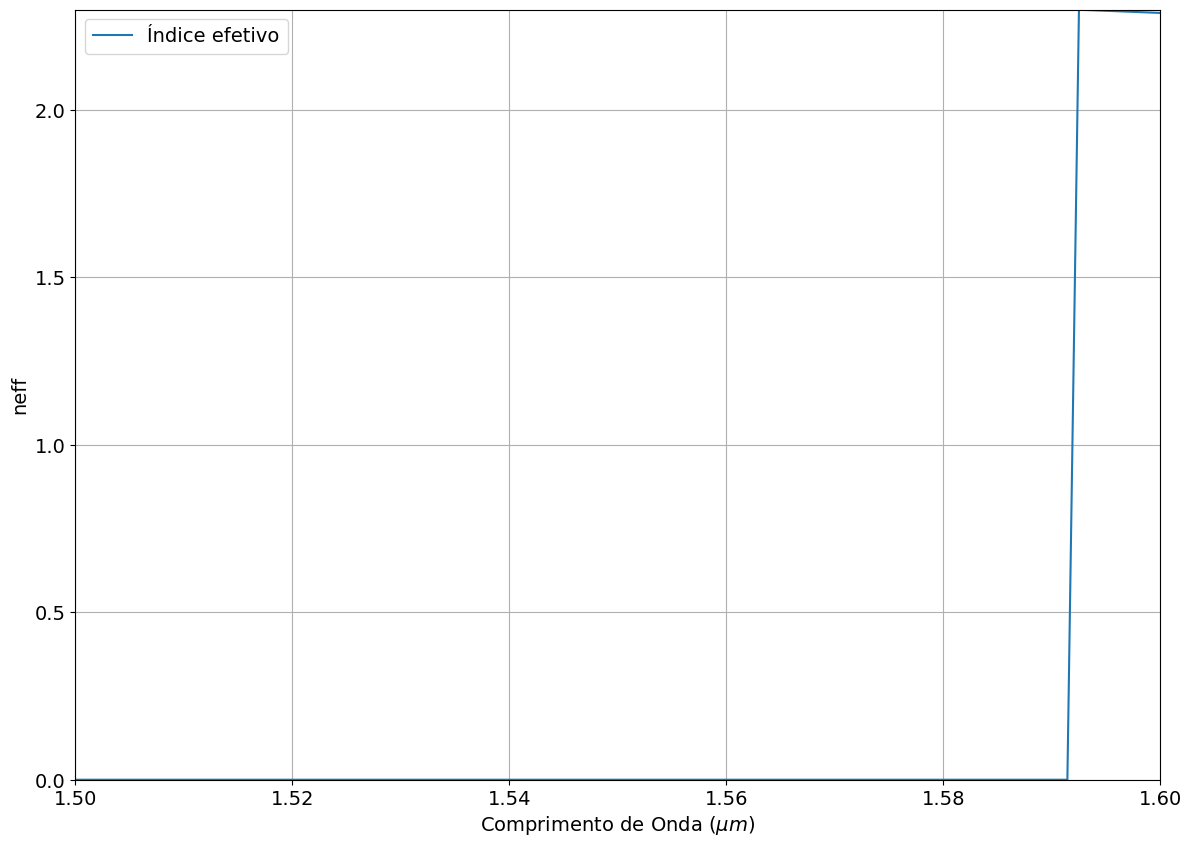

In [12]:
from scipy.constants import c

neff = np.squeeze(np.abs(mode.getresult("FDE::data::frequencysweep", "neff")))
comprimento_de_onda = np.squeeze(c/mode.getresult("FDE::data::frequencysweep", "f"))

plt.figure(figsize=(14,10))

plt.plot(comprimento_de_onda*1e6,neff, label = 'Índice efetivo')

plt.xlabel('Comprimento de Onda $(\mu m)$', fontsize = 14)
plt.ylabel('neff', fontsize = 14)

plt.tick_params(axis='both', labelsize=14)

plt.xlim(1.5,1.6)
plt.ylim(min(neff) ,max(neff))

plt.legend(loc = "best", fontsize = 14)

plt.grid(True)

plt.show()
